In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum().sum()

866

In [6]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Cabin'].fillna('N', inplace=True)
data['Embarked'].fillna('N', inplace=True)

In [7]:
data.isnull().sum().sum()

0

In [8]:
data['Cabin'] = data['Cabin'].str[:1]

In [9]:
data['Cabin'].head(5)

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [10]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

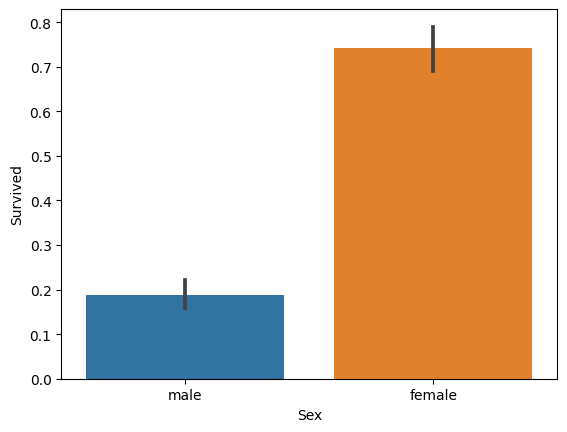

In [11]:
sns.barplot(x='Sex', y='Survived', data=data)

<Axes: xlabel='Pclass', ylabel='Survived'>

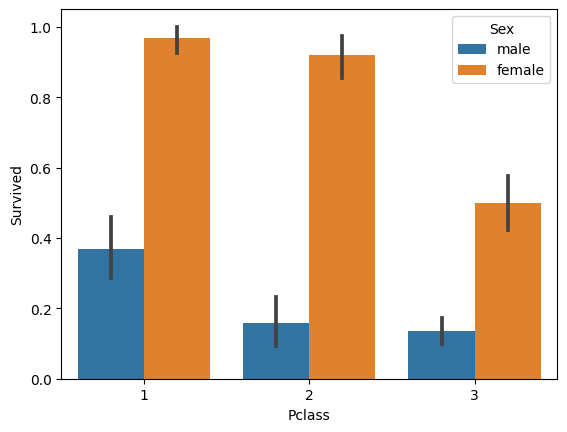

In [12]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)

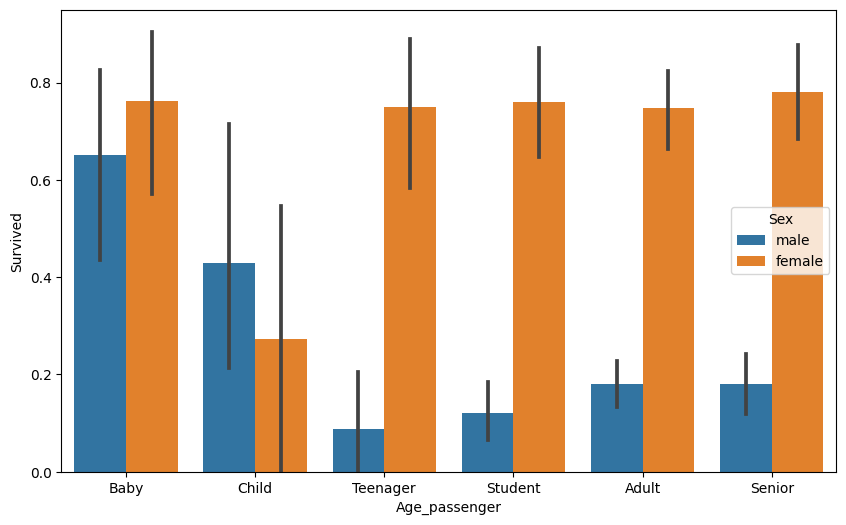

In [13]:
def get_category (age):
    passenger = ''
    if age <= 5:
        passenger = 'Baby'
    elif age <= 12:
        passenger= 'Child'
    elif age <= 18:
        passenger= 'Teenager'
    elif age <= 25:
        passenger= 'Student'
    elif age <= 35:
        passenger = 'Adult'
    else:
        passenger = 'Senior'
    return passenger
plt.figure(figsize=(10,6))
group_names = [ 'Baby', 'Child', 'Teenager', 'Student', 'Adult','Senior']
data['Age_passenger'] = data['Age'].apply(lambda x: get_category(x))
sns.barplot(x ='Age_passenger', y='Survived', hue='Sex', data=data, order=group_names)
data.drop('Age_passenger', axis=1, inplace=True)

In [14]:
from sklearn import preprocessing
def encode_features(data):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])
    return data

data = encode_features(data)

In [15]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [16]:
def fillNa(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df
# remove unnecessary attributers
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df
# Encoding the labels
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data preprocessing
def transform_features(df):
    df = fillNa(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [17]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df,
test_size=0.3, random_state=45)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier 
DecisionTreeClassifier = DecisionTreeClassifier(random_state=45)
DecisionTreeClassifier.fit(x_train, y_train)
DecisionTreeClassifier_pred = DecisionTreeClassifier.predict(x_test)
print('DecisionTreeClassifier accuracy is : {0:.2f}'.format(accuracy_score(y_test,DecisionTreeClassifier_pred)))

# RandomForestClassifier 
RandomForestClassifier = RandomForestClassifier(random_state=45)
RandomForestClassifier.fit(x_train, y_train)
RandomForestClassifier_pred = RandomForestClassifier.predict(x_test)
print('RandomForestClassifier accuracy is : {0:.2f}'.format(accuracy_score(y_test,RandomForestClassifier_pred)))

# LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(x_train, y_train)
LogisticRegression_pred = LogisticRegression.predict(x_test)
print('LogisticRegression accuracy is : {0:.2f}'.format(accuracy_score(y_test, LogisticRegression_pred)))


DecisionTreeClassifier accuracy is : 0.77
RandomForestClassifier accuracy is : 0.83
LogisticRegression accuracy is : 0.82
